<a href="http://www.utt.fr"><img src="logo-UTT.svg" width="200" align="left"></a>
### Formation d'Ingénieur en Génie Mécanique
#### Eléments de bureau d'études (code UE TN12 niveau L3)
---

* Rapide tutoriel sur les [notebook et JupyterLab](https://github.com/PasLafon/UTT-Teaching/blob/master/Tuto-Perso-Jupyter/Tuto-Jupyter.md)
* Rapide tutoriel pour [télécharger ce notebook](https://github.com/PasLafon/UTT-Teaching/blob/master/Tuto-Perso-Jupyter/Tuto-nbviewer-GitHub.md) et le rendre actif (l'éxecuter, le modifier, ..) 

---

# Espace de conception : Exemple d'application

---
Objectif de l'exercice :
* Mettre en pratique sur un exemple simple la notion d'espace de conception vue en cours.
* Apprendre à mettre en équation un problème de dimensionnement.
* Apprendre à programmer des boucles pour trouver la solution en s'initiant au langage python dans l'environnemen de NoteBook Juypter.


---

### Description du problème de dimensionnement :

On décrit ici une étape d'une démarche de conception nécessitant de dimensionner un train d'engrenage. La formalisation du problème de dimensionnement, telle que proposée ici, est une étape importante, qui conditionne en grande partie la manière de résoudre le problème.

<img src="Fig-engrenage-simple.svg" width="400" align=center>

----
On se donne le cahier des charges suivant :
* Le couple transmis, le pignon $(1)$ (petite roue dentée) est moteur et $C_1=500\text{ N.m}$.
* Le matériau des dentures (acier) et la contrainte mécanique maximale admissible à la flexion : $\sigma_{Flim}=70\text{ MPa}$.
* Le rapport de réduction : $i=1/4$.
* Nombre minimal de dents sur le pignon : $18$ (pour éviter les interférences de taillage).
* La liste de modules $m$ (taille des dents) et les largeurs de dentures $b$ correspondantes, disponible dans le catalologue du fournisseur de roues dentées.

|                      |      |      |      |      |      |      |      |      |      |      |      |      |
|---------------------:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|:----:|
|Modules $[\text{mm}]$ |  0.25|0.30  |0.40  |0.50  |0.60  |0.75  |0.80  |1.00  |1.25  |1.50  | 1.75 |2.00  |
|Largeur $[\text{mm}]$ |  2.50|2.50  |3.00  |5.00  |6.00  |6.00  |8.00  |8.00  |8.00  |12.0  |18.0  |20.0  |



Dans le respect du cahier des charges, on cherche à **dimensionner l'engrenage qui permet de minimiser le volume** de la trasnmission.
___

### 1) Mise en équation du problème :

On liste ici toutes les équations connues et utiles pour dimensionner un engrenage :

Relations géométriques et cinématiques, $(1)\to$ pignon, $(2)\to$ roue :

* Géométrie :

    * Relation entre les rayons primitifs $r_{1,2}$, le nombre de dents $Z_{1,2}$ et le module $m$ : $r_1=\dfrac{m}{2}Z_1$ et $r_2=\dfrac{m}{2}Z_2$
    
    * Relation définisant l'entraxe $a$ : $a = r_1+r_2$
    
    * La "forme" de la roue dentée est imposée puisque la largeur dépend du module on a donc : $b=\varphi(m)$, $\varphi$ traduisant le lien entre $b$ et $m$ du tableau du cahier des charges.
    
* Cinématique :

    * Rapport de réduction $i$ de la trasnmission : $r_1=ir_2$


* Efforts dans la transmision :

    * Effort tangentiel $T$ sur les dentures, tangent au rayon primitif : $T = \dfrac{C_1}{r_1}$ où $C_1$ est le couple s'exerçant sur le pignon.
    
* Contrainte mécanique due à la flexion des dents et condition de résistance :

    * $\sigma=\dfrac{5.5T}{bm}$
    
    * $\sigma\leq\sigma_{\text{Flim}}$

### 2) Détermination de l'espace de conception :

#### 2.1) Dimension de l'espace de conception :

Dans les relations écrites ci dessus on dénombre **$12$ paramètres** : $r_1$, $r_2$, $a$, $i$, $Z_1$, $Z_2$, $m$, $b$, $T$, $C_1$, $\sigma$, $\sigma_{\text{Flim}}$

Dont $3$ d'entre eux sont connus ($C_1$, $\sigma_{\text{Flim}}$, $i$), ce sont des données du cahier des charges, les $9$ autres sont des inconnues à déterminer :
$$r_1, r_2, a, Z_1, Z_2, m, b, T, \sigma$$

*Remarque : $m$ et $b$ ne sont pas des données, leurs valeurs est à choisir dans un tableau et $b$ n'est pas indépendant de $m$*

Si on compte les signes "$=$" on dénombre $7$ relations égalités, on ne peut donc pas déterminer la totalité des $9$ paramètres inconnus. C'est donc un problème avec $9-7=2$ degrés de liberté ($2$ des $9$ paramètres).

<span style="color:red"> L'espace de conception est donc de dimension 2</span>

Il va donc falloir trouver une méthode pour choisir la valeur de ces paramètres "libres" permettant de :
1. Minimiser le volume de la transmission
2. Respecter la limite sur la contrainte mécanique de flexion dans les dents.

Cette façon de poser le problème est tout à fait générale, elle peut s'appliquer à n'importe quel problème de dimensionnement en mécanique, à conditions de savoir identifier les bonnes relations du modèle de dimensionnement.

#### 2.2) Détermination de l'espace de conception

Avec les relations :

* $r_1=ir_2$, $r_1=\dfrac{m}{2}Z_1$, $r_2=\dfrac{m}{2}Z_2$

On élimine $r_1$, $r_2$, $Z_2$ et $a = r_1+r_2$ devient :

$$a=\dfrac{m}{2}Z_1\left(1 + \frac{1}{i}\right)$$

Avec :

* $T = \dfrac{C_1}{r_1}$

On élimine $T$, et $\sigma=\dfrac{5.5T}{bm}$ devient :

$$\sigma=\frac{11C_1}{bm^2 Z_1}$$

Avec la relation précédente on élimine $\sigma$ et $\sigma\leq\sigma_{\text{Flim}}$ devient :

$$\frac{11C_1}{bm^2 Z_1}\leq\sigma_{\text{Flim}}$$

Il reste donc $4$ paramètres : $Z_1$, $m$, $b$, $a$ et $3$ données : $i$, $C_1$et $\sigma_{\text{Flim}}$

En fait $b$ et $m$ sont liés, et $a$ est l'entraxe qui est directement lié au volume de la transmission que souhaite minimiser. Quand l'entraxe $a$ augmente, le volume $V$ des engrenages augmente, en effet :
$$V = \pi b(r_1^2+r_2^2)=\pi b(a^2-2r_1r_2)=\pi b\left(\dfrac{m^2}{2}Z_1^2\left(1 + \frac{1}{i}\right)^2-2\frac{m^2Z_1^2}{i}\right)=\pi b \frac{m^2Z_1^2}{2}\left(\frac{i-1}{i}\right)^2$$

L'entraxe augmente avec $mZ_1$ et le volume avec $(mZ_1)^2$.

Il reste donc bien 2 paramètres : $Z_1$ et $m$ ($b$ étant dépendant de $m$).

On cherche donc à avoir :
$$a(\color{red}{m,Z_1})=\dfrac{\color{red}{m}}{2}\color{red}{Z_1}\left(1 + \frac{1}{\color{blue}{i}}\right)$$
le plus petit possible.

En respectant :
$$\frac{11\color{blue}{C_1}}{b\color{red}{m^2 Z_1}}\leq\color{blue}{\sigma_{\text{Flim}}}$$

En rouge les paramètres libres $\color{red}{m}$, $\color{red}{Z_1}$ et en bleu les données  $\color{blue}{\sigma_{\text{Flim}}}$, $\color{blue}{C_1}$ et $\color{blue}{i}$.

L'espace de conception est donc l'ensemble des couples de valeurs de $(\color{red}{m},\color{red}{Z_1})$ qui satisfont la l'inégalité ci-dessus.

### 3) Recherche des solutions

#### 3.1) Par une exploration systématique

* On peut imaginer une exploration systématique de l'espace de conception en testant toutes les valeurs possibles de $m$ et de $Z_1$ car sa "taille" n'est pas trop importante :
$12$ valeurs de $m$ et une centaine de valeurs de $Z_1$ soit environ $12\times100=1200$ couples ($m$,$Z_1$).
* En pseudo langage cela donne l'algorithme suivant :

    * $a_\text{Min}\leftarrow+\infty$
    * Pour toutes les valeurs de $m$ faire :
        * Pour toutes les valeurs de $Z_1$ faire :
            * Caculer $\sigma$ et $a$
            * Si ($\sigma\leq\sigma_{\text{Flim}}$) alors :
                * Si $(a<a_\text{Min})$ alors :
                    * $a_\text{Min}\leftarrow a$
                    * Affiche la solution
                    
  A la fin d'execution le dernier affichage donne la solution.
            

Le programme en langage Python :

In [362]:
# On charge le module numpy pour le calcul numérique avec des vecteurs et des matrices (i.e des tableaux de 1 à n dimensions)
import numpy as np 
#
# Données du cahier des charges :
# Tableaus des modules et largeurs :
modules  = np.array([0.25,0.3,0.4,0.5,0.6,0.75,0.8,1,1.25,1.5,1.75,2 ])
largeurs = np.array([ 2.5,2.5,  3,  5,  6,   6,  8,8,   8, 12,  18,20])
# Données de la transmission
C1 = 500     # Couple en N.m
i = 1/4      # Rapport de réduction
SigFlim = 70 # Contrainte limite en MPa

# Tableau des nombres de dents -> on genere le tableau : 18,19,....,100.
dentures = np.arange(18,100,1)
# L'entraxe mini est initialiser avec une grande valeur
amin = 1e40
# 1er boucle sur "m"
for im,m in enumerate(modules):
    b = largeurs[im]
    # 2ième boucle sur "Z1"
    for Z1 in dentures:
        Sig = (11*C1)/(b*m**2*Z1)
        a = m*Z1*(1+1/i)/2
        # Test sur la limite de contrainte mécanique en flexion
        if (Sig<=SigFlim):
            # Test sur la valeur de l'entraxe 
            if a<amin:
                amin = a
                print('Entraxe : %6.2fmm, Z1 : %d, Module : %4.2f, Contraine : %6.2fMPa'%(a,Z1,m,Sig))

Entraxe :  78.75mm, Z1 : 63, Module : 0.50, Contraine :  69.84MPa
Entraxe :  55.50mm, Z1 : 37, Module : 0.60, Contraine :  68.82MPa
Entraxe :  45.00mm, Z1 : 24, Module : 0.75, Contraine :  67.90MPa
Entraxe :  36.00mm, Z1 : 18, Module : 0.80, Contraine :  59.68MPa


---
**Comentaire sur ces solutions ?**

---

#### 3.2) Avec une représentation graphique 

Ici l'espace de conception est à $2$ dimensions, on peut donc le représenter graphiquement avec la technique suivante :
* $a(\color{red}{m,Z_1})\to$ est une fonction de $2$ variables, c'est donc une surface que l'on va représenter en traçant les contours ou lignes de niveaux (comme une carte topographique).
* La limite sur $\sigma$ est aussi une fonction de $2$ variables, c'est aussi une surface, mais on tracer un seul contour (ligne de niveaux) celui pour lequel $\sigma=\sigma_{\text{Flim}}$ et on va colorier la zone pour la laquelle $\sigma>\sigma_{\text{Flim}}$.

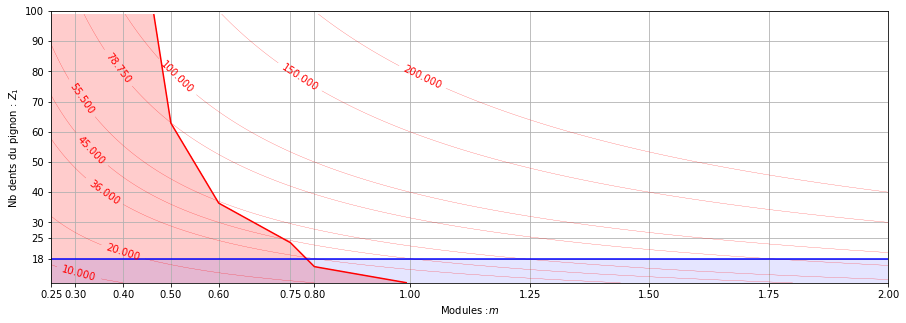

In [363]:
# On charge le module matplotlib pour le trace de graphique (syntaxe semblable à Matlab)
import matplotlib.pyplot as plt
# Genere 
dentures = np.arange(10,100,1)
# Pour generer les "grilles" de valeur X->"m",Y->"Z1"
[X,Y] = np.meshgrid(modules,dentures)
# Calcul de l'entraxe et de la contrainte pour les grilles X->"m",Y->"Z1"
a = (X*Y)*(1+1/i)/2
Sig = (11*C1)/(X**2*largeurs*Y)
Z = Y
# Creation d'une figure de taille 15x5p
plt.figure(figsize=(15,5))

# Contours de l'entrace "a" avec des labels de valeur.
niveaux = [10,20,36,45,55.50,78.75,100,150,200]
Ca=plt.contour(X,Y,a,niveaux,colors='r',linewidths=0.2)
plt.clabel(Ca,niveaux)

# Contour de sigma
plt.contour(X,Y,Sig,[SigFlim],colors='r')
plt.contourf(X,Y,Sig,[SigFlim,10000],colors='r',alpha=0.2)

# Limite sur le nombre de dents Z >= 18 dents, tracer comme un contour.
plt.contour(X,Y,Z,[18],colors='b')
plt.contourf(X,Y,Z,[0,18],colors='b',alpha=0.1)

# Graduation en modules, titres des axes et grille.
plt.xticks(modules)
plt.yticks([18,25,30,40,50,60,70,80,90,100])
plt.xlabel(r'Modules :$m$')
plt.ylabel(r'Nb dents du pignon : $Z_1$ ')
plt.grid('on')

---

**Questions :**
* Où la solution sur ce graphe ?
* Où sont les solutions obtenues par l'algorithme ?

---

#### 3.3) Par une compréhension du problème de dimensionnement

* La condition :

$$\frac{11C_1}{bm^2 Z_1}\leq\sigma_{\text{Flim}}$$

  permet de définir une limite sur le nombre dents minimal en fonction de $bm^2$ :
  
$$Z_1\geq \frac{11C_1}{bm^2 \sigma_{\text{Flim}}}$$  

Zmini = [503. 350. 164.  63.  37.  24.  16.  10.   7.   3.   2.   1.]


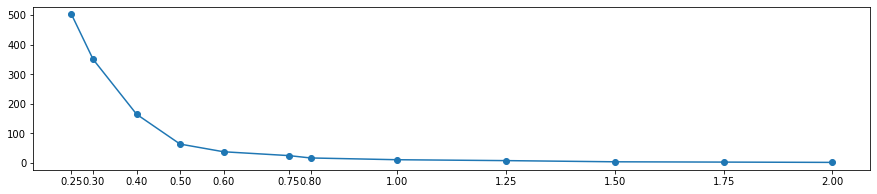

In [364]:
Zmini = np.ceil((11*C1)/(modules**2*largeurs*SigFlim))
print('Zmini =',Zmini)
plt.figure(figsize=(15,3))
plt.xticks(modules)
plt.plot(modules,Zmini,'o-')


On a donc les plus petites valeurs possible de $Z_1$  qui respectent pour chaque module la condition de résistance mécanique $\sigma\leq\sigma_\text{Flim}$. Ces valeurs de $Z_1$ donnent le plus petit entraxe de la transmission.

On voit que seules les $6$ premières valeurs de $bm^2$ permettent d'avoir $Z_1\geq 18$. Dans le tableau `Zmini` on va remplacer toutes les valeurs $<18$ par $18$ pour n'avoir que des valeurs acceptables.

Zmini = [503. 350. 164.  63.  37.  24.  18.  18.  18.  18.  18.  18.]


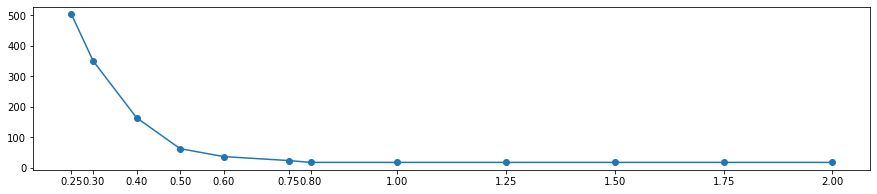

In [365]:
# Instruction pas si simple à comprendre ...-> cf gestion des tableaux dans numpy ...
Zmini[Zmini<18]=18
print('Zmini =',Zmini)

plt.figure(figsize=(15,3))
plt.xticks(modules)
plt.plot(modules,Zmini,'o-')

Pour ces valeurs de $Z_1$ on tracer calculer l'entraxe et la contrainte mécanique correspondante et tracer les courbes correspondantes.

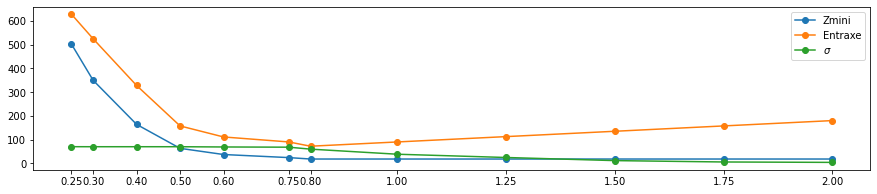

In [366]:
a = modules*Zmini*(1+1/i)
Sig = (11*Ce)/(modules**2*largeurs*Zmini)
plt.figure(figsize=(15,3))
plt.xticks(modules)
plt.plot(modules,Zmini,'o-')
plt.plot(modules,a,'o-')
plt.plot(modules,Sig,'o-')
plt.legend(('Zmini','Entraxe',r'$\sigma$'))

---

**Questions :**

* Où est la solution sur ce graphique ?
* Où sont situées les valeurs de ce graphique sur le graphique du 3.2) ?

---